In [1]:
%matplotlib inline
import os
import random
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import models
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.transforms.functional as TF
import torchvision.utils as vutils
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import DataLoader, Dataset
from torch.utils.data.dataset import random_split
import numpy as np
import matplotlib.pyplot as plt
import pickle
from metric import *
from utils import * 

In [2]:
dataroot = '/data/voc2012'
SAVE_DIR = '/data/model'

In [3]:
def to_tensor_target(img):
  img = np.array(img)
  # border
  img[img==255] = 0 # border = background 
  return torch.LongTensor(img)


size = (513,513)
MEAN = [0.485, 0.456, 0.406]
STD = [0.229, 0.224, 0.225]
transform_input = transforms.Compose([
                                   transforms.Resize(size),
                                   transforms.ToTensor(),
                                   transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                                    ])

transform_mask = transforms.Compose([
                                   transforms.Resize(size),
                                   transforms.Lambda(to_tensor_target)
                                   ])

In [4]:
train_dataset = dset.VOCSegmentation(dataroot,year='2012', image_set='train', download=True,
                                     transform= transform_input,
                                     target_transform= transform_mask)

val_dataset = dset.VOCSegmentation(dataroot,year='2012', image_set='val', download=True,
                                     transform= transform_input,
                                     target_transform= transform_mask)

Using downloaded and verified file: /data/voc2012/VOCtrainval_11-May-2012.tar
Using downloaded and verified file: /data/voc2012/VOCtrainval_11-May-2012.tar


In [5]:
batch_size = 4

dataloader_train = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size)
dataloader_val = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size)
# Decide which device we want to run on
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("device :",device)

device : cuda:0


## Load model

In [6]:
! ls /data/model

SVM_transfer_30_voc.pt		deeplabv3_autosupervised_voc07.pt  fcn32_bn.pt
cnn_classif_transfer_30_voc.pt	deeplabv3_unsupervised_voc.pt	   fcn8.pt
deeplabv3_10_autosup_voc.pt	deeplabv3_voc.pt		   fcn8_bn.pt
deeplabv3_30_semisup_voc.pt	fcn16.pt			   iou
deeplabv3_30_voc.pt		fcn16_bn.pt			   loss
deeplabv3_50_voc.pt		fcn32.pt


In [7]:
def load_model(file=None):
    if file is None:
        model = torchvision.models.segmentation.deeplabv3_resnet101(pretrained=True)
        model.to(device)
    else:
        model = torch.load(os.path.join(SAVE_DIR,file))
    return model

In [8]:
model = load_model('deeplabv3_30_voc.pt')

/workspace/metric.py:63: RuntimeWarning: invalid value encountered in true_divide
  acc_cls = np.diag(hist) / hist.sum(axis=1)
/workspace/metric.py:65: RuntimeWarning: invalid value encountered in true_divide
  iu = np.diag(hist) / (hist.sum(axis=1) + hist.sum(axis=0) - np.diag(hist))
/workspace/metric.py:44: RuntimeWarning: invalid value encountered in true_divide
  return np.nanmean(area_inter/area_union)


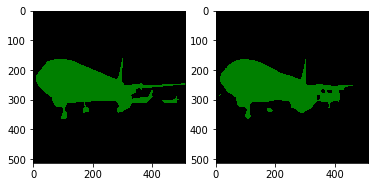

predicted classes :  ['background', 'aeroplane']
real classes :  ['background', 'aeroplane']
IoU on this mask : 0.912066482171629


/workspace/utils.py:153: RuntimeWarning: invalid value encountered in true_divide
  return np.nanmean(area_inter/area_union)


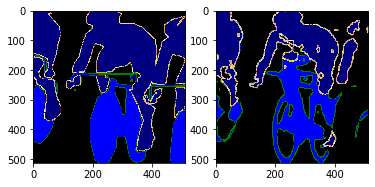

predicted classes :  ['background', 'bicycle', 'motorbike', 'person']
real classes :  ['background', 'bicycle', 'person']
IoU on this mask : 0.42712201945019374


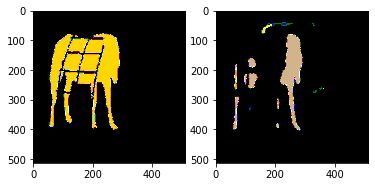

predicted classes :  ['background', 'bicycle', 'boat', 'horse']
real classes :  ['background', 'horse']
IoU on this mask : 0.3137798809538871


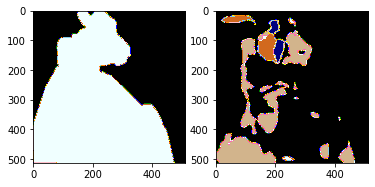

predicted classes :  ['background', 'chair', 'cow', 'dog', 'horse', 'person']
real classes :  ['background', 'cow']
IoU on this mask : 0.08625347000264823


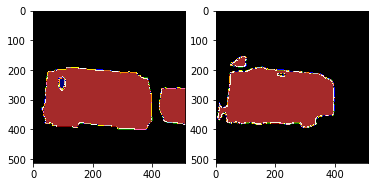

predicted classes :  ['background', 'train']
real classes :  ['background', 'person', 'train']
IoU on this mask : 0.5580266345637305


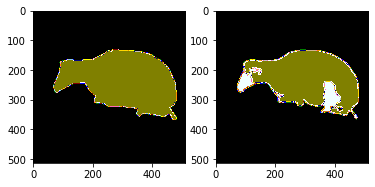

predicted classes :  ['background', 'cow', 'sheep']
real classes :  ['background', 'sheep']
IoU on this mask : 0.6041641128160716


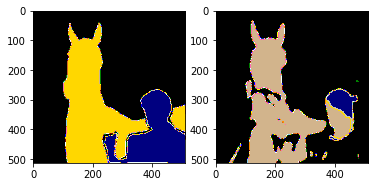

predicted classes :  ['background', 'bicycle', 'dog', 'horse', 'person']
real classes :  ['background', 'horse', 'person']
IoU on this mask : 0.29190709089119976


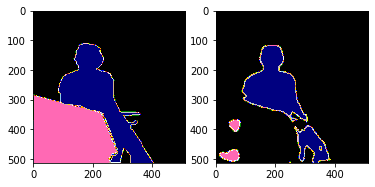

predicted classes :  ['background', 'bicycle', 'diningtable', 'person']
real classes :  ['background', 'diningtable', 'person']
IoU on this mask : 0.4073914882558428


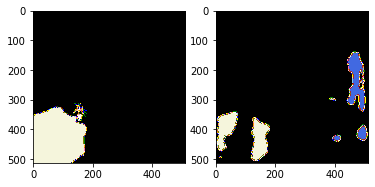

predicted classes :  ['background', 'sofa', 'tvmonitor']
real classes :  ['background', 'pottedplant', 'sofa']
IoU on this mask : 0.32752295547867594


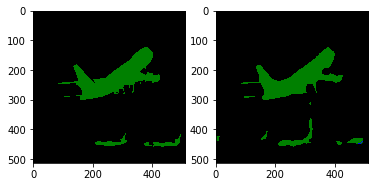

predicted classes :  ['background', 'aeroplane', 'boat']
real classes :  ['background', 'aeroplane']
IoU on this mask : 0.5794744558649799


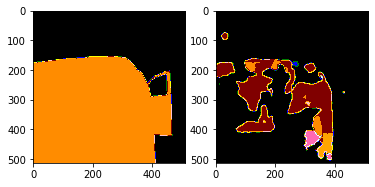

predicted classes :  ['background', 'bicycle', 'boat', 'bottle', 'bus', 'car', 'diningtable', 'train']
real classes :  ['background', 'car']
IoU on this mask : 0.07221352344770533


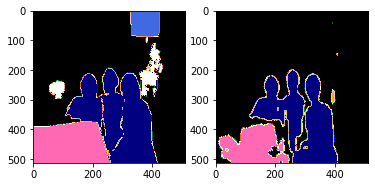

predicted classes :  ['background', 'bottle', 'diningtable', 'person', 'pottedplant', 'tvmonitor']
real classes :  ['background', 'diningtable', 'person', 'pottedplant', 'tvmonitor']
IoU on this mask : 0.3951821988452793


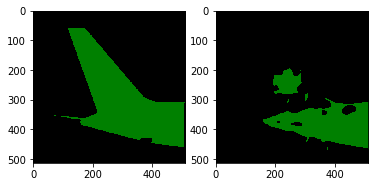

predicted classes :  ['background', 'aeroplane']
real classes :  ['background', 'aeroplane']
IoU on this mask : 0.7235350610767846


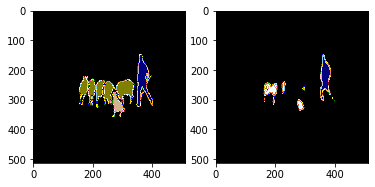

predicted classes :  ['background', 'cow', 'horse', 'person', 'sheep']
real classes :  ['background', 'dog', 'person', 'sheep']
IoU on this mask : 0.27865793330554633


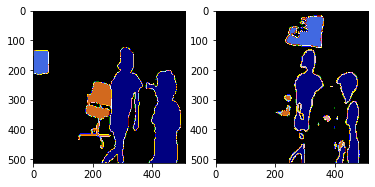

predicted classes :  ['background', 'chair', 'dog', 'person', 'tvmonitor']
real classes :  ['background', 'chair', 'person', 'tvmonitor']
IoU on this mask : 0.3043474632442461


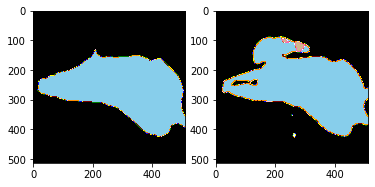

predicted classes :  ['background', 'cat', 'diningtable', 'dog']
real classes :  ['background', 'cat']
IoU on this mask : 0.44543758215154394


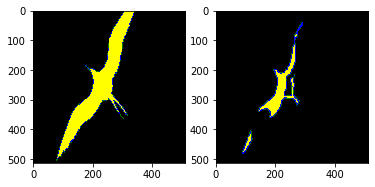

predicted classes :  ['background', 'bird']
real classes :  ['background', 'bird']
IoU on this mask : 0.6614128238785607


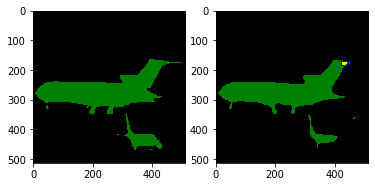

predicted classes :  ['background', 'aeroplane', 'bird']
real classes :  ['background', 'aeroplane']
IoU on this mask : 0.6151620440365985


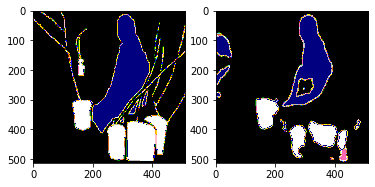

predicted classes :  ['background', 'chair', 'diningtable', 'person', 'pottedplant']
real classes :  ['background', 'person', 'pottedplant']
IoU on this mask : 0.38569273738704163


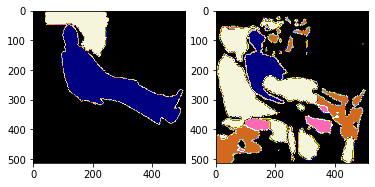

predicted classes :  ['background', 'chair', 'diningtable', 'person', 'sofa']
real classes :  ['background', 'person', 'sofa']
IoU on this mask : 0.18672715558995653


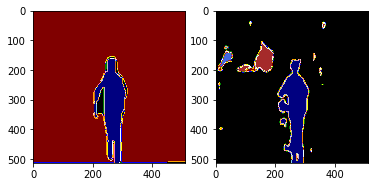

predicted classes :  ['background', 'bus', 'chair', 'person', 'train', 'tvmonitor']
real classes :  ['background', 'bus', 'person']
IoU on this mask : 0.13012714158868408


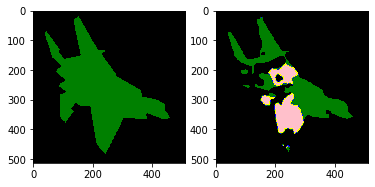

predicted classes :  ['background', 'aeroplane', 'boat']
real classes :  ['background', 'aeroplane']
IoU on this mask : 0.47188873866747844


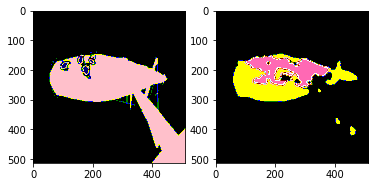

predicted classes :  ['background', 'aeroplane', 'boat', 'diningtable']
real classes :  ['background', 'boat', 'person']
IoU on this mask : 0.2457337675973949


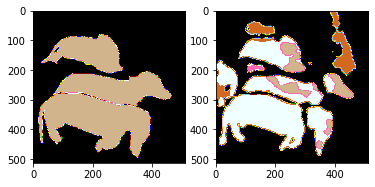

predicted classes :  ['background', 'chair', 'cow', 'diningtable', 'dog', 'sofa']
real classes :  ['background', 'dog']
IoU on this mask : 0.16180902678311596


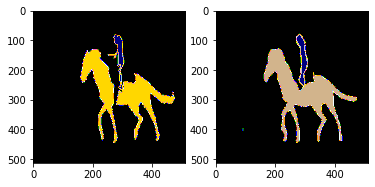

predicted classes :  ['background', 'bicycle', 'horse', 'person']
real classes :  ['background', 'horse', 'person']
IoU on this mask : 0.5990065205048891


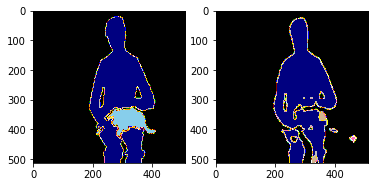

predicted classes :  ['background', 'diningtable', 'dog', 'person']
real classes :  ['background', 'cat', 'person']
IoU on this mask : 0.34964657623697654


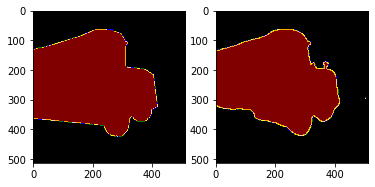

predicted classes :  ['background', 'bus']
real classes :  ['background', 'bus']
IoU on this mask : 0.9403610031357104


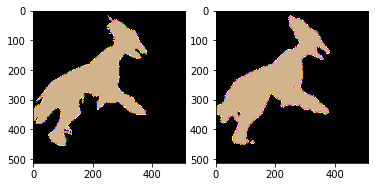

predicted classes :  ['background', 'dog']
real classes :  ['background', 'dog']
IoU on this mask : 0.9175588714122236


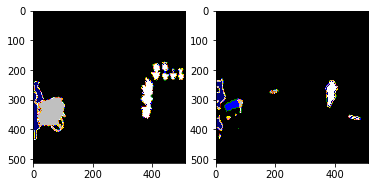

predicted classes :  ['background', 'bicycle', 'chair', 'motorbike', 'person', 'pottedplant']
real classes :  ['background', 'motorbike', 'person', 'pottedplant']
IoU on this mask : 0.32242104964349405


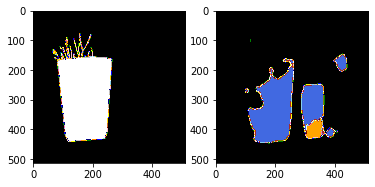

predicted classes :  ['background', 'bottle', 'chair', 'tvmonitor']
real classes :  ['background', 'pottedplant']
IoU on this mask : 0.17068545749910335


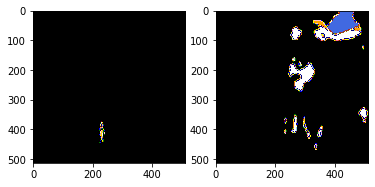

predicted classes :  ['background', 'bottle', 'pottedplant', 'tvmonitor']
real classes :  ['background', 'horse', 'person']
IoU on this mask : 0.15440370726491667


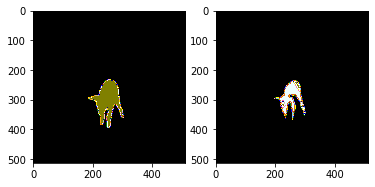

predicted classes :  ['background', 'cow', 'sheep']
real classes :  ['background', 'sheep']
IoU on this mask : 0.3664562406587928


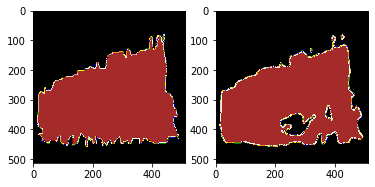

predicted classes :  ['background', 'train']
real classes :  ['background', 'train']
IoU on this mask : 0.8944890370814789


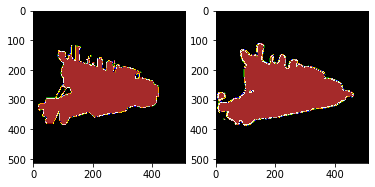

predicted classes :  ['background', 'train']
real classes :  ['background', 'train']
IoU on this mask : 0.9075252783021065


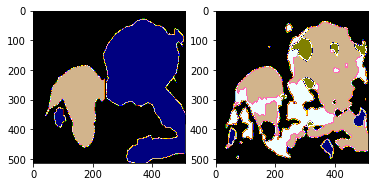

predicted classes :  ['background', 'chair', 'cow', 'dog', 'horse', 'person', 'sheep', 'sofa']
real classes :  ['background', 'dog', 'person']
IoU on this mask : 0.1176021557005961


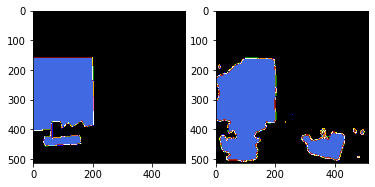

predicted classes :  ['background', 'chair', 'pottedplant', 'sofa', 'tvmonitor']
real classes :  ['background', 'tvmonitor']
IoU on this mask : 0.29973857517787794


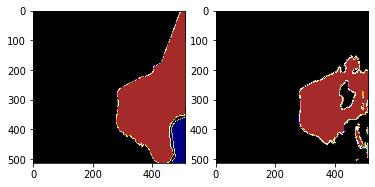

predicted classes :  ['background', 'person', 'sheep', 'train']
real classes :  ['background', 'person', 'train']
IoU on this mask : 0.4075415046671803


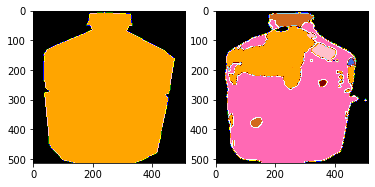

predicted classes :  ['background', 'boat', 'bottle', 'bus', 'chair', 'diningtable', 'tvmonitor']
real classes :  ['background', 'bottle']
IoU on this mask : 0.16304053685610037


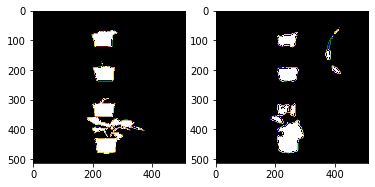

predicted classes :  ['background', 'bicycle', 'pottedplant']
real classes :  ['background', 'pottedplant']
IoU on this mask : 0.5164728821023087


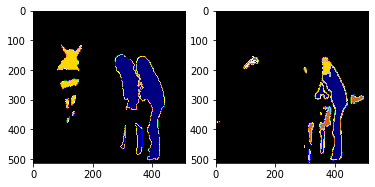

predicted classes :  ['background', 'chair', 'cow', 'dog', 'horse', 'person', 'sheep']
real classes :  ['background', 'horse', 'person']
IoU on this mask : 0.20380032832621703


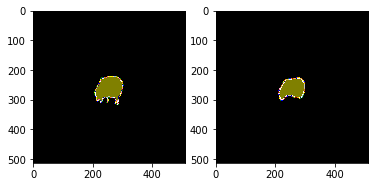

predicted classes :  ['background', 'sheep']
real classes :  ['background', 'sheep']
IoU on this mask : 0.9070467807452538


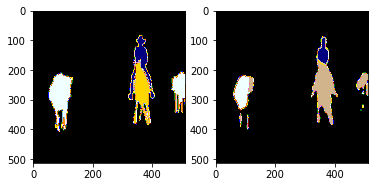

predicted classes :  ['background', 'cow', 'horse', 'person']
real classes :  ['background', 'cow', 'horse', 'person']
IoU on this mask : 0.5627434025273811


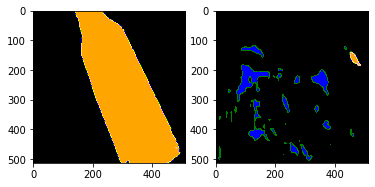

predicted classes :  ['background', 'bicycle', 'bottle']
real classes :  ['background', 'bottle']
IoU on this mask : 0.2014834317513902


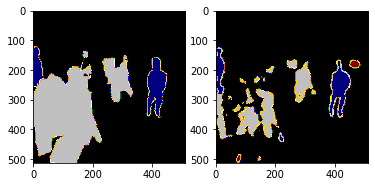

predicted classes :  ['background', 'bus', 'motorbike', 'person', 'tvmonitor']
real classes :  ['background', 'motorbike', 'person']
IoU on this mask : 0.38109194547517156


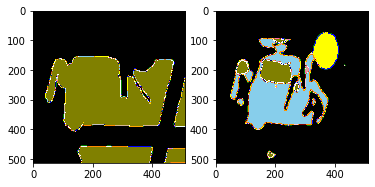

predicted classes :  ['background', 'bird', 'cat', 'dog', 'sheep']
real classes :  ['background', 'sheep']
IoU on this mask : 0.16138848779866785


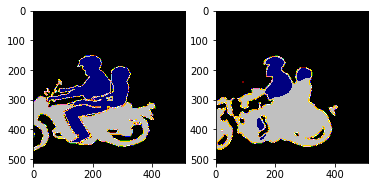

predicted classes :  ['background', 'motorbike', 'person']
real classes :  ['background', 'motorbike', 'person']
IoU on this mask : 0.6093867563813768


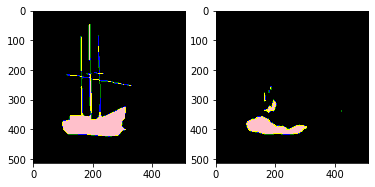

predicted classes :  ['background', 'boat']
real classes :  ['background', 'boat']
IoU on this mask : 0.6798573838911472


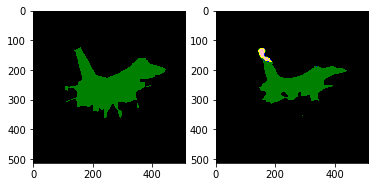

predicted classes :  ['background', 'aeroplane', 'boat']
real classes :  ['background', 'aeroplane']
IoU on this mask : 0.5464430839734745


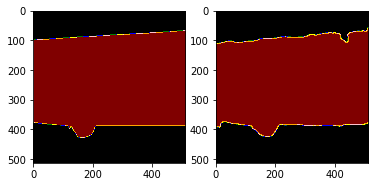

predicted classes :  ['background', 'bus']
real classes :  ['background', 'bus']
IoU on this mask : 0.9611209250628108


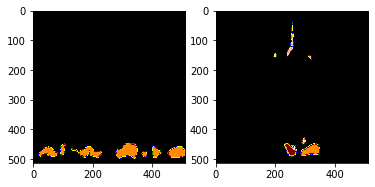

predicted classes :  ['background', 'bird', 'boat', 'bottle', 'bus', 'car', 'motorbike', 'train']
real classes :  ['background', 'car']
IoU on this mask : 0.14627094572374905


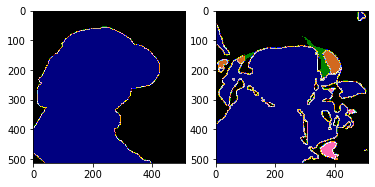

predicted classes :  ['background', 'aeroplane', 'chair', 'diningtable', 'person']
real classes :  ['background', 'person']
IoU on this mask : 0.2633189771780439


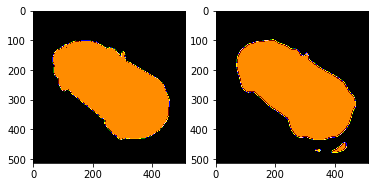

predicted classes :  ['background', 'car', 'motorbike']
real classes :  ['background', 'car']
IoU on this mask : 0.6419691324288751


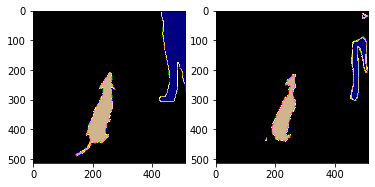

predicted classes :  ['background', 'diningtable', 'dog', 'person']
real classes :  ['background', 'dog', 'person']
IoU on this mask : 0.509523435885525


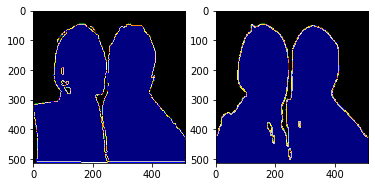

predicted classes :  ['background', 'person']
real classes :  ['background', 'person']
IoU on this mask : 0.9026297543886783


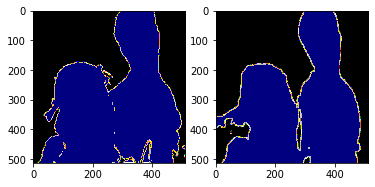

predicted classes :  ['background', 'person']
real classes :  ['background', 'person']
IoU on this mask : 0.8968739469407765


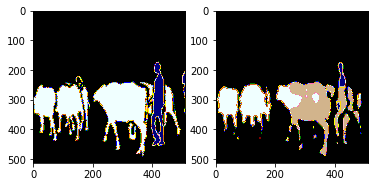

predicted classes :  ['background', 'cow', 'horse', 'person']
real classes :  ['background', 'cow', 'person']
IoU on this mask : 0.391335072485014


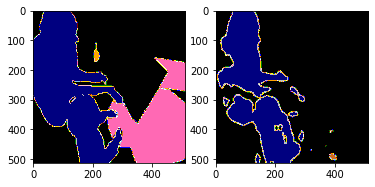

predicted classes :  ['background', 'chair', 'diningtable', 'person']
real classes :  ['background', 'bottle', 'diningtable', 'person']
IoU on this mask : 0.2722133638885853


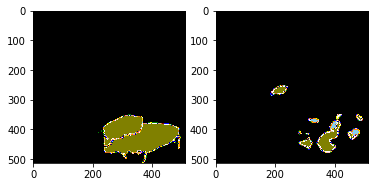

predicted classes :  ['background', 'cat', 'sheep']
real classes :  ['background', 'sheep']
IoU on this mask : 0.3776251175730572


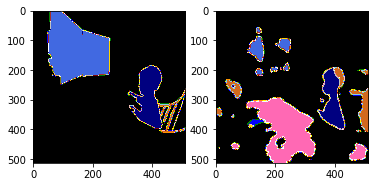

predicted classes :  ['background', 'bicycle', 'chair', 'diningtable', 'motorbike', 'person', 'tvmonitor']
real classes :  ['background', 'chair', 'person', 'tvmonitor']
IoU on this mask : 0.23679989344125643


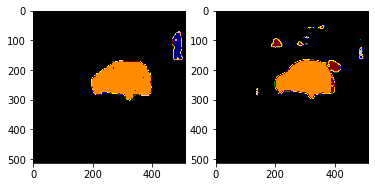

predicted classes :  ['background', 'bus', 'car', 'person']
real classes :  ['background', 'car', 'person']
IoU on this mask : 0.50465500566497


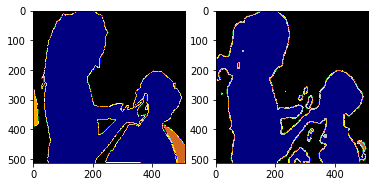

predicted classes :  ['background', 'chair', 'dog', 'person', 'sofa']
real classes :  ['background', 'bottle', 'chair', 'person']
IoU on this mask : 0.30172548125383486


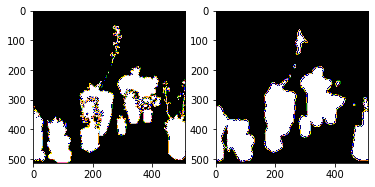

predicted classes :  ['background', 'pottedplant']
real classes :  ['background', 'pottedplant']
IoU on this mask : 0.7974924433688892


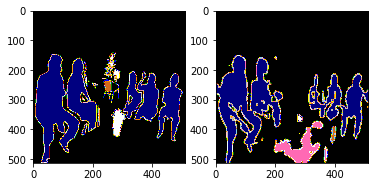

predicted classes :  ['background', 'chair', 'diningtable', 'person', 'pottedplant', 'sofa']
real classes :  ['background', 'chair', 'person', 'pottedplant']
IoU on this mask : 0.2831843297056889


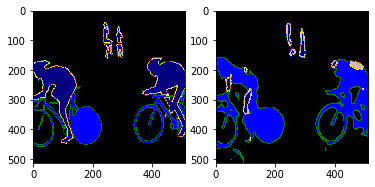

predicted classes :  ['background', 'bicycle', 'motorbike', 'person']
real classes :  ['background', 'bicycle', 'person']
IoU on this mask : 0.356677884900055


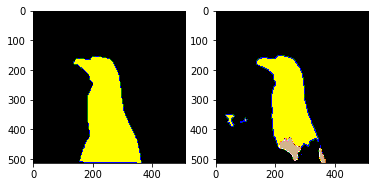

predicted classes :  ['background', 'bird', 'horse']
real classes :  ['background', 'bird']
IoU on this mask : 0.5428731696922758


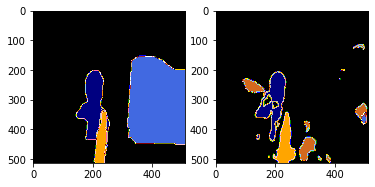

predicted classes :  ['background', 'bottle', 'chair', 'person', 'tvmonitor']
real classes :  ['background', 'bottle', 'person', 'tvmonitor']
IoU on this mask : 0.41747200227423475


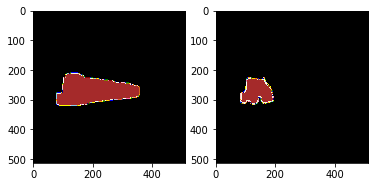

predicted classes :  ['background', 'train']
real classes :  ['background', 'train']
IoU on this mask : 0.6530182318697941


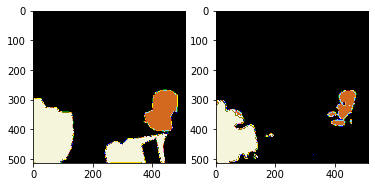

predicted classes :  ['background', 'chair', 'sofa', 'tvmonitor']
real classes :  ['background', 'chair', 'sofa']
IoU on this mask : 0.48525684881837583


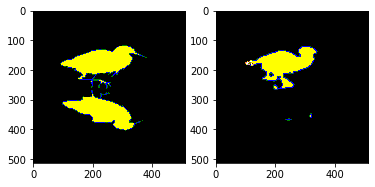

predicted classes :  ['background', 'bird', 'sheep']
real classes :  ['background', 'bird']
IoU on this mask : 0.44951917271028186


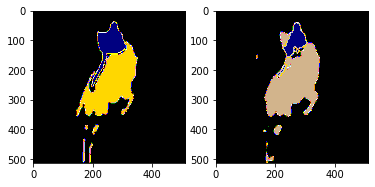

predicted classes :  ['background', 'dog', 'horse', 'person']
real classes :  ['background', 'horse', 'person']
IoU on this mask : 0.5990945007025403


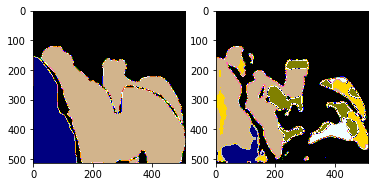

predicted classes :  ['background', 'bird', 'chair', 'cow', 'dog', 'horse', 'person', 'sheep']
real classes :  ['background', 'dog', 'person']
IoU on this mask : 0.13873613977405025


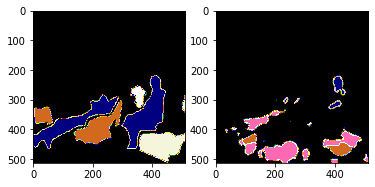

predicted classes :  ['background', 'bottle', 'chair', 'diningtable', 'dog', 'person']
real classes :  ['background', 'chair', 'person', 'pottedplant', 'sofa']
IoU on this mask : 0.11088679431712618


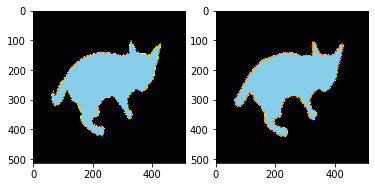

predicted classes :  ['background', 'cat']
real classes :  ['background', 'cat']
IoU on this mask : 0.9692162682500605


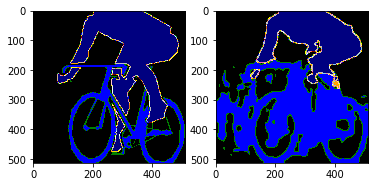

predicted classes :  ['background', 'bicycle', 'bottle', 'person']
real classes :  ['background', 'bicycle', 'person']
IoU on this mask : 0.4123831273304457


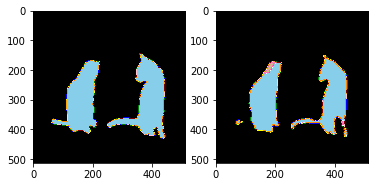

predicted classes :  ['background', 'cat', 'dog']
real classes :  ['background', 'cat']
IoU on this mask : 0.604760407285469


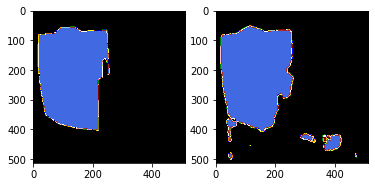

predicted classes :  ['background', 'bus', 'tvmonitor']
real classes :  ['background', 'tvmonitor']
IoU on this mask : 0.5942679176261741


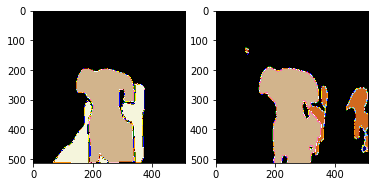

predicted classes :  ['background', 'chair', 'dog', 'person']
real classes :  ['background', 'dog', 'sofa']
IoU on this mask : 0.34895693431889696


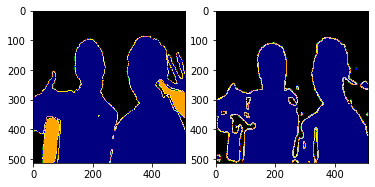

predicted classes :  ['background', 'bottle', 'person', 'sofa']
real classes :  ['background', 'bottle', 'person']
IoU on this mask : 0.420015477149712


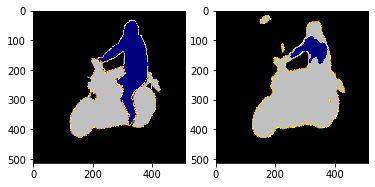

predicted classes :  ['background', 'motorbike', 'person']
real classes :  ['background', 'motorbike', 'person']
IoU on this mask : 0.6483165143534415


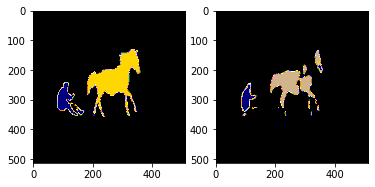

predicted classes :  ['background', 'horse', 'person']
real classes :  ['background', 'horse', 'person']
IoU on this mask : 0.7018437239015342


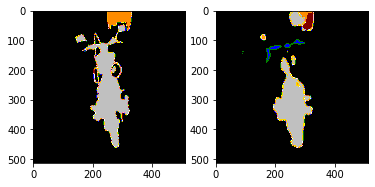

predicted classes :  ['background', 'bicycle', 'bottle', 'bus', 'car', 'motorbike', 'pottedplant']
real classes :  ['background', 'car', 'motorbike']
IoU on this mask : 0.2552563968956096


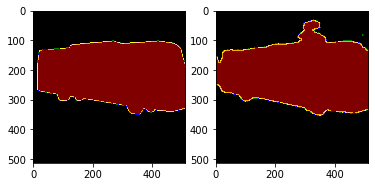

predicted classes :  ['background', 'bus']
real classes :  ['background', 'bus']
IoU on this mask : 0.9163278916293366


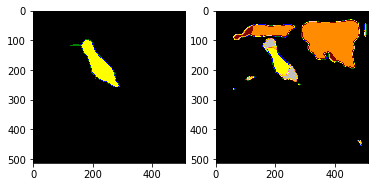

predicted classes :  ['background', 'bird', 'bus', 'car', 'motorbike']
real classes :  ['background', 'bird']
IoU on this mask : 0.26882657812570077


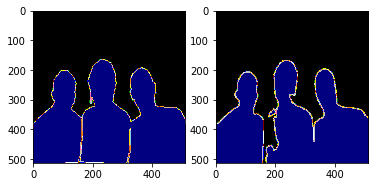

In [ ]:
evaluate_model(model,dataloader_val,criterion=torch.nn.CrossEntropyLoss(ignore_index=21),nclass=21,device=device)